## Big data analytics: Big Data Bowl 
Authored by Connor Grendon, Jason Maloney and Jesse Pezzillo

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings; warnings.simplefilter('ignore')

In [9]:
# This dataset can be downloaded from https://www.kaggle.com/c/nfl-big-data-bowl-2020/data after an agreement is digitally signed through kaggle. 
data = pd.read_csv('train.csv')
#lower all columns
data.columns = map(str.lower, data.columns)

#### View the data and types

In [10]:
pd.set_option('max_columns', None)
#data.head()
cols_to_drop = ['jerseynumber', 'fieldposition', 'stadium', 'location', 'stadiumtype', 'turf', 'gameweather',
               'temperature', 'humidity', 'windspeed', 'winddirection', 'offensepersonnel', 'defensepersonnel']
oi = data.drop(cols_to_drop, axis = 1)
oi.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,season,yardline,quarter,gameclock,possessionteam,down,distance,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,defendersinthebox,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,2017,35,1,14:14:00,NE,3,2,0,0,2543773,SHOTGUN,6.0,left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,2017,35,1,14:14:00,NE,3,2,0,0,2543773,SHOTGUN,6.0,left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,2017,35,1,14:14:00,NE,3,2,0,0,2543773,SHOTGUN,6.0,left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,2017,35,1,14:14:00,NE,3,2,0,0,2543773,SHOTGUN,6.0,left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,2017,35,1,14:14:00,NE,3,2,0,0,2543773,SHOTGUN,6.0,left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1


In [4]:
#pd.set_option('max_columns', None)
data.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,...,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


#### Player height

In [3]:
# create function to convert playerHeight to inches
def heightToInches(x):
    try:
        x,x1 = x.split('-')
        x = int(x)
        x1 = int(x1)
        x = (12*x) + x1
        return(x)
    except:
        return int(x*12)

In [4]:
# run function over column
data["playerheight"] = data["playerheight"].apply(heightToInches)

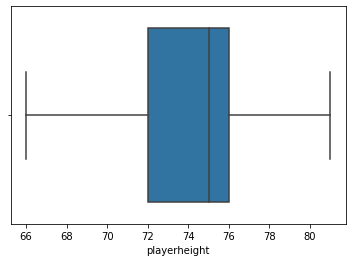

In [5]:
sns.boxplot(data["playerheight"])
plt.show()

#### Player age

In [6]:
# convert TimeHandoff to dates and times
data['timehandoff'] = pd.to_datetime(data['timehandoff'])
data['timesnap'] = pd.to_datetime(data['timesnap'])
data['playerbirthdate'] = pd.to_datetime(data["playerbirthdate"])
# confirm dtype
print('handoff time:',data["timehandoff"].dtype)
print('snap time:',data["timesnap"].dtype)
print('playerbirthdate',data["playerbirthdate"].dtype)

handoff time: datetime64[ns, UTC]
snap time: datetime64[ns, UTC]
playerbirthdate datetime64[ns]


In [7]:
# generate age of each player
def birthDayCalc(df):
    birthDay = df[0].year
    timeHandoff = df[1].year
    age = (timeHandoff - birthDay) 
    return age
data["age"] = data[["playerbirthdate","timehandoff"]].apply(birthDayCalc, axis=1)

In [ ]:
sns.boxplot(data["age"])
plt.show()
print("Player anomolies/Old dudes:")
data['displayname'][data["age"] > 36].unique()

#### Time Since Snap (sec)

In [8]:
# find time from snap to handoff
def time_since_snap(df):
    handoff = df[0]
    snap = df[1]
    time = df[0] - df[1]
    return time.seconds
data['time_since_snap'] = data[['timehandoff', 'timesnap']].apply(time_since_snap, axis = 1)


#### Windspeed

In [ ]:
# convert windspeed
def windConvert(x):
    try:
        x = re.match('[0-9]+',x)
        x = x.groups()
        for i in x:
            y += i
            return(y)
    except:
        return(x)
data["windspeed"] = data["windspeed"].apply(windConvert)
# set NAN to 0
#data["windspeed"] = data["windspeed"].fillna(value=0)
# set to integer
# data["windspeed"] = data["windspeed"].astype(int)

In [ ]:
# plot with na's set to 0
sns.distplot(data["windspeed"].fillna(value=0))
plt.show()
# plot with no na's
sns.distplot(data["windspeed"].dropna())
plt.show()

#### Orientation and Direction

In [ ]:
# create functions to fix oreintation and direction
# Refrenced this notebook to help understand how to modify https://www.kaggle.com/ben519/understanding-x-y-dir-and-orientation
def fixDir(x):
    y = (360-x+90) % 360
    return y
def fixOri(x):
    y = (360-x) % 360
    return y

In [ ]:
# apply oreintation fix
data["orientation"][data["season"] == 2017] = data["orientation"][data["season"] == 2017].apply(fixOri)
# apply direction fix
data["dir"] = data["dir"].apply(fixDir)

#### Distance to the Rusher

In [ ]:
# create a rusher dummy variable
data['rusher'] = 0
data['rusher'][data['nflid'] == data['nflidrusher']] = 1

In [ ]:
# get Rusher X and Y
pos_df = pd.DataFrame(zip(data['x'][data['rusher'] == 1], data['y'][data['rusher'] == 1]), columns = ['x', 'y'])
pos_df.head()

In [ ]:
# need to get each value repeated 22 times, for each player in each play
posdf = pd.DataFrame(zip(pos_df['x'].repeat(22), pos_df['y'].repeat(22)), index = range(len(data)), columns = ['rushx', 'rushy'])
# put the rushX and rushY in the main df
data['rushx'] = posdf['rushx']
data['rushy'] = posdf['rushy']
del posdf # delete df to save memory

In [ ]:
# euclidean dist = sqrt((x1 - x2)^2 + (y1 - y2)^2) - straight line distance
data['disttorush'] = np.sqrt((data['x'] - data['rushx'])**2 + (data['y'] - data['rushy'])**2)
data.head()

In [ ]:
# distribution of players' distance to rusher
sns.distplot(data['disttorush'][data['rusher'] == 0])
plt.show()

# distribution of yards gained/play
sns.distplot(data['yards'])
plt.show()

#### Team Name for Each Player

In [9]:
# this function sets what team the player is on
def teamIdentitySet(x):
    if x["team"] == "home":
        return x["hometeamabbr"]
    else:
        return x["visitorteamabbr"]
# applying function entire data df
data["teamidentity"] = data.apply(teamIdentitySet, axis=1)

#### Minimum Distance From Defender to Rusher by Play

In [ ]:
# create attribute for minimum defensive player from runningback
def minDistanceFromDef(x):
    # get playid 
    x = x["playid"]
    # return back only play with that id
    x = data[data["playid"] == x]
    # Return back minmimum distance of players not on rusher team
    x = min(x["disttorush"][x["teamidentity"] != x["possessionteam"]])
    return x

data["min_distancetorusher"]=data.apply(minDistanceFromDef,axis=1)

#### Match Home, Visitor, and Possession Team Abbreviations

In [11]:
# find teams with mismatched abbreviations
for home_abbr, pos_abbr in zip(sorted(data['hometeamabbr'].unique()),
                                     sorted(data['possessionteam'].unique())):
    if home_abbr != pos_abbr:
        print(home_abbr + ' ' + pos_abbr )

# define a mapping to fix these
def map_abbr(df):
    '''
    input: dataframe
    function: fixes incorrect abbreviations in possession team
    returns: correct abbreviations
    '''
    home_abbr = df['hometeamabbr']
    pos_abbr = df['possessionteam']
    if home_abbr != pos_abbr:
        pos_abbr = home_abbr
    return pos_abbr

data['possessionteam'] = data.apply(map_abbr, axis = 1)
data['possessionteam'].unique()

ARI ARZ
BAL BLT
CLE CLV
HOU HST


array(['NE', 'BUF', 'CHI', 'CIN', 'CLE', 'DET', 'HOU', 'TEN', 'WAS', 'LA',
       'GB', 'SF', 'DAL', 'MIN', 'DEN', 'BAL', 'CAR', 'IND', 'JAX', 'KC',
       'NO', 'PIT', 'TB', 'LAC', 'OAK', 'SEA', 'ATL', 'NYG', 'NYJ', 'PHI',
       'ARI', 'MIA'], dtype=object)

#### Stadium Type

In [ ]:
# Transform stadium type
def clean_stad_type(txt):
    if pd.isna(txt):
        return np.nan
    txt = txt.lower()
    #txt = ''.join([c for c in txt if c not in punctuation])
    txt = re.sub(' +', ' ', txt)
    txt = txt.strip()
    txt = txt.replace('outside', 'outdoor')
    txt = txt.replace('outdor', 'outdoor')
    txt = txt.replace('outddors', 'outdoor')
    txt = txt.replace('outdoors', 'outdoor')
    txt = txt.replace('oudoor', 'outdoor')
    txt = txt.replace('indoors', 'indoor')
    txt = txt.replace('ourdoor', 'outdoor')
    txt = txt.replace('retractable', 'rtr.')
    return txt
data['stadiumtype'] = data['stadiumtype'].apply(clean_stad_type)

In [ ]:
# focus only on outdoor, indoor, open, and closed
def num_stad_type(txt):
    if pd.isna(txt):
        return np.nan
    if 'outdoor' in txt or 'open' in txt:
        return 1
    if 'indoor' in txt or 'closed' in txt:
        return 0
    # else
    return np.nan

data['stadiumtype'] = data['stadiumtype'].apply(num_stad_type)

#### Offensive and Defensive Personnel Counts

In [ ]:
# count defensive position
# differentiate defensive ol and offensive ol - JM
data["ol_d"] = data["defensepersonnel"].str.extract(pat="([1-9] OL)")
data["ol_d"] = data["ol_d"].str.extract(pat="([1-9])")
data["dl"] = data["defensepersonnel"].str.extract(pat="([1-9] DL)")
data["dl"] = data["dl"].str.extract(pat="([1-9])")
data["lb"] = data["defensepersonnel"].str.extract(pat="([1-9] LB)")
data["lb"] = data["lb"].str.extract(pat="([1-9])")
data["db"] = data["defensepersonnel"].str.extract(pat="([1-9] DB)")
data["db"] = data["db"].str.extract(pat="([1-9])")

# differentiate defensive rb and offensive rb - JM
data["rb_d"] = data["defensepersonnel"].str.extract(pat="([1-9] RB)")
data["rb_d"] = data["rb_d"].str.extract(pat="([1-9])")

# count offensive position
# QB, OL, RB, TE, WR, DL, LB, DB
data['qb'] = data['offensepersonnel'].str.extract(pat='([1-9] QB)')
data['qb'] = data['qb'].str.extract(pat='([1-9])')
data['ol'] = data['offensepersonnel'].str.extract(pat='([1-9] OL)')
data['ol'] = data['ol'].str.extract(pat='([1-9])')
data['rb'] = data['offensepersonnel'].str.extract(pat='(\d RB)')
data['rb'] = data['rb'].str.extract(pat='(\d)')
data['te'] = data['offensepersonnel'].str.extract(pat='(\d TE)')
data['te'] = data['te'].str.extract(pat='(\d)')
data['wr'] = data['offensepersonnel'].str.extract(pat='(\d WR)')
data['wr'] = data['wr'].str.extract(pat='(\d)')

# differentiate offensive dl 
data['dl_o'] = data['offensepersonnel'].str.extract(pat='(\d DL)')
data['dl_o'] = data['dl_o'].str.extract(pat='(\d)')
data['lb_o'] = data['offensepersonnel'].str.extract(pat='(\d LB)')
data['lb_o'] = data['lb_o'].str.extract(pat='(\d)')
data['db_o'] = data['offensepersonnel'].str.extract(pat='(\d DB)')
data['db_o'] = data['db_o'].str.extract(pat='(\d)')

# replace nas with 0
data['ol'].fillna(0, inplace = True)
data['dl'].fillna(0, inplace = True)
data['db'].fillna(0, inplace = True)
data['lb'].fillna(0, inplace = True)
data['rb'].fillna(0, inplace = True)
data['ol_d'].fillna(0, inplace = True)
data['rb_d'].fillna(0, inplace = True)
data['te'].fillna(0, inplace = True)
data['wr'].fillna(0, inplace = True)
data['dl_o'].fillna(0, inplace = True)
data['lb_o'].fillna(0, inplace = True)
data['db_o'].fillna(0, inplace = True)

# replace qb nas with 1 - WILDCAT has a qb, but the ball is snapped to someone else - JM
data['qb'].fillna(1, inplace = True)

# set ol == 0 to be 11 - sum(offensive personnel)
off = ['rb', 'qb', 'te', 'wr', 'dl_o', 'lb_o', 'db_o'] 
data[off] = data[off].astype(str).astype(int)
data['ol'][data['ol'] == 0] = 11 - data[off].sum(axis = 1)

# convert rest of personnel to int
defp = ['dl', 'lb', 'rb_d', 'ol_d', 'db']
data[defp] = data[defp].astype(str).astype(int)

# fill lb na with 11 - sum(everyone else on defense)
data['lb'][data['lb'] == 0] = 11 - data[defp].sum(axis = 1)

#### Yards From Own Goal

In [ ]:
#  create variable called yards from own goal
def createYardsFromOwnGoal(x):
    # if the ball is on the possession teams side, just return yardline
    if x["fieldposition"] == x["possessionteam"]:
        return x["yardline"]
    else:
    # if the ball is not on the possesion team side, convert
        return (50 + (50-x["yardline"]))
data["yardfromowngoal"] = data.apply(createYardsFromOwnGoal,axis = 1)

#### Standardize Coordinates - All Plays Direction = right

In [12]:
# standardize coordinates so all plays are left to right (playdirection = right)
def standardizeXCoordinates(x):
    if x["playdirection"] == "left":
        return 120 - x["x"] 
    else:
        return x["x"] 
def standardizeYCoordinates(x):
    if x["playdirection"] == "left":
        return 160/3 - x["y"]
    else:
        return x["y"]
data["x_standard"] = data.apply(standardizeXCoordinates,axis=1)
data["y_standard"] = data.apply(standardizeYCoordinates, axis=1)

#### Mean Yards per Attempt (Cumulative 2017 - 19)

In [ ]:
# function for Mean yards per attempt per team
def MeanPerAtt(x):
    t= data[data["teamidentity"]==x]
    mean= sum(t["yards"])/ (len(t['playid'].unique())*22)
    return x,mean
MeanPerAtt('BUF')  # test with buffalo, compare to prior calculation to see if it works correctly


#### Run Success 
Success = gain >= half yards to first down

In [ ]:
# function for run success feature
def runSuccess(x):
    t= data[data["playid"]==x]
    if sum(t['yards'])/22 >= (sum(t['distance'])/22)/2:
        #return x,1
        # use this for the function applied to the df
        return 1 
    else:
        #return x,0
        # use this for the function applied to the df
        return 0
runSuccess(20170907000118) #test on a single play

#### Mean Yards per Game

In [ ]:
# function for yards per game per team
def MeanPerGame(x):
    t= data[data["teamidentity"]==x]
    mean= sum(t['yards'])/(len(t['gameid'].unique())*22)
    return x, mean
MeanPerGame('BUF') # test on buffalo compare to prior calc

In [ ]:
#### Mean Yards per Attempt (by Season)
# get each season
df17 = data.loc[data['season'] == 2017]
df18 = data.loc[data['season'] == 2018]
df19 = data.loc[data['season'] == 2019]

# get avg yards per attempt by team
avg_yards_17 = df17.groupby('possessionteam')['yards'].mean()
avg_yards_18 = df18.groupby('possessionteam')['yards'].mean()
avg_yards_19 = df19.groupby('possessionteam')['yards'].mean()

# get a list of teams
team_list = list(data['teamidentity'].unique())

del df17, df18, df19

In [ ]:
# average yards per rush attempt for each team for each season
def mean_ypa(df):
    '''
    input: dataframe
    operation: map the mean yards per attempt of each team and season
    returns: mean yards per attempt for that team in that season
    '''
    for team in team_list:
        # 2017 season
        if (df['teamidentity'] == team) & (df['season'] == 2017):
            ypa = avg_yards_17[team]
        # 2018 season
        elif (df['teamidentity'] == team) & (df['season'] == 2018):
            ypa = avg_yards_18[team]
        # 2019 season
        elif (df['teamidentity'] == team) & (df['season'] == 2019):
            ypa = avg_yards_19[team]
        else:
            continue
        
        return ypa
data['mean_yards_per_rush'] = data.apply(mean_ypa, axis = 1)

In [ ]:
# create a dataframe of unique team names that can be passed into the functions
teams=data['teamidentity'].unique()
teams= pd.DataFrame(teams)
# create a dataframe of unique plays that can be passed to the functions
plays=data['playid'].unique()
plays= pd.DataFrame(plays)

In [ ]:
# apply mean yards per game per team function for each unique team
MeanGame=teams[0].apply(MeanPerGame)
MeanGame

#### Future Coordinates

In [13]:
# get future x coordinate
def future_x(df):
    '''
    input: df - designed to be used with apply()
    calculates: new x coordinate with speed, acceleration, and direction
    Returns: new x-coordinate
    '''
    import math
    # distance traveled = speed(time) + (acceleration/2)(time)^2
    distance = df['s']*t + df['a']/2*t**2 
    # delta x = cos(direction)  convert to radians
    dx = distance * math.cos(math.radians(df['dir'])) 
    # future = initial position + change
    new_x = df['x_standard'] + dx
    # can't have coordinates outside the boundaries
    if new_x < 0:
        new_x = 0
    elif new_x > 120:
        new_x = 120
    return new_x
    
# get future y coordinate
def future_y(df):
    '''
    input: df - designed to be used with apply()
    calculates: new y coordinate with speed, acceleration, and direction
    Returns: new y-coordinate
    '''
    import math
     # distance traveled = speed(time) + acceleration(time)^2
    distance = df['s']*t + df['a']/2*t**2 
    # delta y = sin(direction)  convert to radians
    dy = distance * math.sin(math.radians(df['dir'])) 
    # future = initial position + change 
    new_y = df['y_standard'] + dy
    # can't have coordinates outside the boundaries
    if new_y < 0:
        new_y = 0
    elif new_y > 53.3:
        new_y = 53.3
    return new_y

In [81]:
oi = data[22220:22264]
oi.shape

(44, 54)

In [82]:
# get location of each player at time of handoff
for play in oi['playid'].unique():
    t = oi.loc[data['playid'] == play]['time_since_snap'].tolist()[0]
    oi['x_handoff'] = oi.apply(future_x, axis = 1)
    oi['y_handoff'] = oi.apply(future_y, axis = 1)

In [ ]:
### This takes a while to run - lots of calculations

# set a time interval (begin, end, step)
times = np.arange(0.5, 6.5, 0.5)
for t in times:
    data['{}_sec_x'.format(t)] = data.apply(future_x, axis = 1)
    data['{}_sec_y'.format(t)] = data.apply(future_y, axis = 1)
data.head()

In [ ]:
# get location of each player at time of handoff
for play in data['playid'].unique():
    t = data.loc[data['playid'] == play]['time_since_snap'].tolist()[0]
    data['x_handoff'] = data.apply(future_x, axis = 1)
    data['y_handoff'] = data.apply(future_y, axis = 1)

In [60]:
#oi[['x_standard', 'x_handoff', 'y_standard', 'y_handoff']]

#### Defender Is Blocked

In [ ]:
# blocked defender
# want to check if (x,y) of each offensive player is within 1.5 yards of a defensive player
# iterate through plays

'''
go through play by play
calculate the distance of each defender to each offensive player (11 * 11) = 121 calculations per play
* distance is euclidean sqrt((x1 - x0)^2 + (y1 - y0)^2)
from scipy.spatial import distance
distance.euclidean(p1, p2)
store each calculation
if any calculation <= 1.5 (or whatever threshold) 
consider defender blocked (1)
else consider defender unblocked (0)
'''
# get playid 
    x = x["playid"]
    # return back only play with that id
    x = data[data["playid"] == x]

def loop_with_zip(df):
    temp = 0
    for a, b in zip(df['A'], df['B']):
        temp += a + b
    return temp
    
    
# this is designed to be used in a for loop
def blocked_defender(playid, df):
    from scipy.spatial import distance
    # isolate the play
    play_info = df.loc[df['playid'] == playid]
    
    
    
    
    
    
    
    
    distance.euclidean(p1, p2)

In [20]:
# euclidean distance
from scipy.spatial import distance

In [83]:
pd.set_option('max_columns', None)
oi.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,age,time_since_snap,teamidentity,x_standard,y_standard,x_handoff,y_handoff
22220,2017091706,20170917062638,away,83.03,25.31,1.68,2.77,0.15,357.54,165.70,496790,Everson Griffen,97,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,75,273,1987-12-22,Southern California,DE,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,30,1,MIN,36.97,28.023333,33.999967,28.780385
22221,2017091706,20170917062638,away,82.30,28.79,1.81,2.06,0.10,341.40,200.86,496802,Linval Joseph,98,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,76,329,1988-10-10,East Carolina,DT,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,29,1,MIN,37.70,24.543333,35.046153,23.532050
22222,2017091706,20170917062638,away,82.30,31.32,2.68,0.25,0.32,23.24,179.60,2495723,Brian Robison,96,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,75,259,1983-04-27,Texas,DE,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,34,1,MIN,37.70,22.013333,34.895068,22.032916
22223,2017091706,20170917062638,away,77.74,17.24,3.24,1.28,0.37,253.31,243.90,2505552,Terence Newman,23,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,70,197,1978-09-04,Kansas State,CB,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,39,1,MIN,42.26,36.093333,40.553036,32.608986
22224,2017091706,20170917062638,away,70.16,30.18,1.32,3.52,0.20,352.09,49.43,2525323,Andrew Sendejo,34,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,73,210,1987-09-09,Rice,SS,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,30,1,MIN,49.84,23.153333,51.843160,25.492938


In [78]:
# offense dummy variable
# 1 = offense, 0 = defense
oi['offense'] = 0
#oi['defense'] = 0
#oi[oi['possessionteam'] == oi['teamidentity']]['offense'] = 1
#oi[oi['possessionteam'] != oi['teamidentity']]['defense'] = 1

In [62]:
oi.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,age,time_since_snap,teamidentity,x_standard,y_standard,x_handoff,y_handoff,offense
22220,2017091706,20170917062638,away,83.03,25.31,1.68,2.77,0.15,357.54,165.70,496790,Everson Griffen,97,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,75,273,1987-12-22,Southern California,DE,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,30,1,MIN,36.97,28.023333,33.999967,28.780385,0
22221,2017091706,20170917062638,away,82.30,28.79,1.81,2.06,0.10,341.40,200.86,496802,Linval Joseph,98,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,76,329,1988-10-10,East Carolina,DT,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,29,1,MIN,37.70,24.543333,35.046153,23.532050,0
22222,2017091706,20170917062638,away,82.30,31.32,2.68,0.25,0.32,23.24,179.60,2495723,Brian Robison,96,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,75,259,1983-04-27,Texas,DE,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,34,1,MIN,37.70,22.013333,34.895068,22.032916,0
22223,2017091706,20170917062638,away,77.74,17.24,3.24,1.28,0.37,253.31,243.90,2505552,Terence Newman,23,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,70,197,1978-09-04,Kansas State,CB,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,39,1,MIN,42.26,36.093333,40.553036,32.608986,0
22224,2017091706,20170917062638,away,70.16,30.18,1.32,3.52,0.20,352.09,49.43,2525323,Andrew Sendejo,34,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,73,210,1987-09-09,Rice,SS,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,30,1,MIN,49.84,23.153333,51.843160,25.492938,0


In [85]:
cols_to_keep = ['playid', 'nflid', 'teamidentity', 'possessionteam','x_handoff', 'y_handoff']
oi = oi[cols_to_keep]
oi.transpose()

,22220,22221,22222,22223,22224,22225,22226,22227,22228,22229,22230,22231,22232,22233,22234,22235,22236,22237,22238,22239,22240,22241,22242,22243,22244,22245,22246,22247,22248,22249,22250,22251,22252,22253,22254,22255,22256,22257,22258,22259,22260,22261,22262,22263
playid,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062638,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758,20170917062758
nflid,496790,496802,2495723,2505552,2525323,2532948,2540155,2543459,2543706,2552312,2552448,81821,497042,2506109,2508061,2508111,2533043,2540175,2541716,2543572,2552633,2553737,496802,2495723,2505552,2506779,2525323,2532948,2540155,2543459,2552312,2552603,2555177,81821,497042,2506109,2508061,2508111,2533043,2540175,2541716,2552633,2553737,2558149
teamidentity,MIN,MIN,MIN,MIN,MIN,MIN,MIN,MIN,MIN,MIN,MIN,1,1,1,1,1,1,1,1,1,1,1,MIN,MIN,MIN,MIN,MIN,MIN,MIN,MIN,MIN,MIN,MIN,1,1,1,1,1,1,1,1,1,1,1
possessionteam,PIT,PIT,PIT,PIT,PIT,PIT,PIT,PIT,PIT,PIT,PIT,1,1,1,1,1,1,1,1,1,1,1,PIT,PIT,PIT,PIT,PIT,PIT,PIT,PIT,PIT,PIT,PIT,1,1,1,1,1,1,1,1,1,1,1
x_handoff,34,35.0462,34.8951,40.553,51.8432,28.9418,39.8883,35.1207,36.0775,34.4146,47.4936,35.1858,35.2402,30.8712,38.8878,34.4067,28.5246,25.9573,35.8566,40.9355,34.2634,37.8511,100.683,96.9492,101.397,97.5415,108.444,109.174,106.411,105.238,104.173,100.191,109.683,101.99,99.2728,91.0266,98.4426,100.1,97.902,99.304,99.3352,96.5666,104.077,99.1238
y_handoff,28.7804,23.532,22.0329,32.609,25.4929,23.8524,7.47082,25.2466,24.7433,30.6339,39.9745,24.1685,23.9209,20.9775,6.3886,21.402,25.9472,21.8785,23.6606,37.8468,26.6904,30.0687,30.3313,28.1291,16.7239,28.173,28.3588,35.6066,9.4014,29.1448,27.7911,34.3153,41.5323,28.6683,28.2908,29.9363,6.77064,23.7791,26.1444,28.3281,31.7589,25.9275,38.5152,15.0089


In [79]:
def offense(df):
    pos_team = df['possessionteam']
    team = df['teamidentity']
    count = 0
    if pos_team == team:
        count = 1
    return count
oi['offense'] = oi[['teamidentity', 'possessionteam']].apply(offense, axis = 1)
oi

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,age,time_since_snap,teamidentity,x_standard,y_standard,x_handoff,y_handoff,offense
22220,2017091706,20170917062638,away,83.03,25.31,1.68,2.77,0.15,357.54,165.70,496790,Everson Griffen,97,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,75,273,1987-12-22,Southern California,DE,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,30,1,MIN,36.97,28.023333,33.999967,28.780385,0
22221,2017091706,20170917062638,away,82.30,28.79,1.81,2.06,0.10,341.40,200.86,496802,Linval Joseph,98,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,76,329,1988-10-10,East Carolina,DT,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,29,1,MIN,37.70,24.543333,35.046153,23.532050,0
22222,2017091706,20170917062638,away,82.30,31.32,2.68,0.25,0.32,23.24,179.60,2495723,Brian Robison,96,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,75,259,1983-04-27,Texas,DE,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,34,1,MIN,37.70,22.013333,34.895068,22.032916,0
22223,2017091706,20170917062638,away,77.74,17.24,3.24,1.28,0.37,253.31,243.90,2505552,Terence Newman,23,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,70,197,1978-09-04,Kansas State,CB,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,39,1,MIN,42.26,36.093333,40.553036,32.608986,0
22224,2017091706,20170917062638,away,70.16,30.18,1.32,3.52,0.20,352.09,49.43,2525323,Andrew Sendejo,34,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,73,210,1987-09-09,Rice,SS,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,30,1,MIN,49.84,23.153333,51.843160,25.492938,0
22225,2017091706,20170917062638,away,84.07,32.43,5.49,4.19,0.59,56.35,157.12,2532948,Harrison Smith,22,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,74,214,1989-02-02,Notre Dame,FS,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,28,1,MIN,35.93,20.903333,28.941779,23.852399,0
22226,2017091706,20170917062638,away,79.92,43.41,1.91,1.10,0.23,9.28,265.53,2540155,Xavier Rhodes,29,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,73,218,1990-06-19,Florida State,CB,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,27,1,MIN,40.08,9.923333,39.888275,7.470816,0
22227,2017091706,20170917062638,away,79.86,28.17,3.89,2.26,0.42,33.04,179.05,2543459,Anthony Barr,55,2017,27,3,08:47:00,PIT,1,10,PIT,17,9,2540175,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-17 19:02:57+00:00,2017-09-17 19:02:56+00:00,1,77,255,1992-03-18,UCLA,OLB,PIT,MIN,2,Heinz Field,Pittsburgh,Outdoors,Grass,Sunny,78.0,64.0,1,From S,25,1,MIN,40.14,25.163333,35.120690,25.246564,0
22228,2017091706,20170917062638,away,82.50,28.13,0.86,1.27,0.09,11.59,197.92,2543706,Shamar Stephen,93,2017,27,3,08:47:00,PIT,1,10,PIT,

In [75]:
oi.tail()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,age,time_since_snap,teamidentity,x_standard,y_standard,x_handoff,y_handoff,offense
22259,2017091706,20170917062758,1,25.30,23.16,3.58,2.76,0.49,229.53,338.16,2540175,1,26,2017,11,3,1,1,1,10,1,17,9,2540175,1,1,6.0,1,1,2017-09-17 19:05:58+00:00,2017-09-17 19:05:57+00:00,3,73,225,1992-02-18,1,1,1,1,2,1,1,1,1,1,78.0,64.0,1,1,25,1,1,94.70,30.173333,99.304003,28.328134,1
22260,2017091706,20170917062758,1,22.20,20.88,0.88,1.61,0.01,155.25,335.66,2541716,1,74,2017,11,3,1,1,1,10,1,17,9,2540175,1,1,6.0,1,1,2017-09-17 19:05:58+00:00,2017-09-17 19:05:57+00:00,3,76,295,1991-04-23,1,1,1,1,2,1,1,1,1,1,78.0,64.0,1,1,26,1,1,97.80,32.453333,99.335230,31.758860,1
22261,2017091706,20170917062758,1,21.91,27.07,1.31,0.50,0.18,130.72,192.43,2552633,1,81,2017,11,3,1,1,1,10,1,17,9,2540175,1,1,6.0,1,1,2017-09-17 19:05:58+00:00,2017-09-17 19:05:57+00:00,3,79,250,1994-06-04,1,1,1,1,2,1,1,1,1,1,78.0,64.0,1,1,23,1,1,98.09,26.263333,96.566567,25.927549,1
22262,2017091706,20170917062758,1,20.02,12.92,3.11,2.81,0.38,226.93,335.14,2553737,1,17,2017,11,3,1,1,1,10,1,17,9,2540175,1,1,6.0,1,1,2017-09-17 19:05:58+00:00,2017-09-17 19:05:57+00:00,3,70,187,1992-12-23,1,1,1,1,2,1,1,1,1,1,78.0,64.0,1,1,25,1,1,99.98,40.413333,104.076630,38.515216,1
22263,2017091706,20170917062758,1,20.51,35.07,2.77,1.01,0.42,180.56,263.58,2558149,1,19,2017,11,3,1,1,1,10,1,17,9,2540175,1,1,6.0,1,1,2017-09-17 19:05:58+00:00,2017-09-17 19:05:57+00:00,3,73,215,1996-11-22,1,1,1,1,2,1,1,1,1,1,78.0,64.0,1,1,21,1,1,99.49,18.263333,99.123803,15.008871,1


In [86]:
'''
go through play by play
calculate the distance of each defender to each offensive player (11 * 11) = 121 calculations per play
* distance is euclidean sqrt((x1 - x0)^2 + (y1 - y0)^2)
from scipy.spatial import distance
distance.euclidean(p1, p2)
store each calculation
if any calculation <= 1.5 (or whatever threshold) 
consider defender blocked (1)
else consider defender unblocked (0)
'''
for i in range(len(22200:22264)):
    for play in oi['playid'].unique():
        for player in oi['nflid']:
            u = (oi['x_handoff'], oi['y_handoff'])
            if oi['teamidentity'] == oi['possessionteam']:
            
            
            d = distance.euclidean(oi)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [96]:
oi.index = range(len(oi))
oi.head()

,playid,nflid,teamidentity,possessionteam,x_handoff,y_handoff
0,20170917062638,496790,MIN,PIT,33.999967,28.780385
1,20170917062638,496802,MIN,PIT,35.046153,23.532050
2,20170917062638,2495723,MIN,PIT,34.895068,22.032916
3,20170917062638,2505552,MIN,PIT,40.553036,32.608986
4,20170917062638,2525323,MIN,PIT,51.843160,25.492938


In [98]:
for player in oi['nflid']:
    u = (oi['x_handoff'], oi['y_handoff'])
    for i in range(11):
        d = 
    

SyntaxError: unexpected EOF while parsing (<ipython-input-98-6f48663a02d4>, line 1)

In [ ]:
# offense dummy variable
# 1 = offense, 0 = defense
data['offense'] = 0
data[data['possessionteam'] == data['teamidentity']] = 1

In [ ]:
oi = data[['playid', 'teamidentity', 'possessionteam', 'offense', 'x_standard', 'y_standard'
           'time_since_handoff', 'x_handoff', 'y_handoff']].sample(30)
oi.head()


In [ ]:
for play in data['playid'].unique():
    
def blocked_def(play):
    play = df[play]

#### Effective Directional Acceleration

In [ ]:
# effective downfield acceleration
def eff_df_acc(df):
    '''
    input: dataframe
    calculates: x component of acceleration
    returns: x component
    positive -> left to right
    negative -> right to left
    '''
    downfield_acc = df['a'] * math.cos(math.radians(df['dir']))
    return downfield_acc

# effective crossfield accleration
def eff_cf_acc(df):
    '''
    input: dataframe
    calculates: y component of acceleration
    returns: y component
    positive -> up toward "far sideline"
    negative -> down toward "near sideline"
    '''
    crossfield_acc = df['a'] * math.sin(math.radians(df['dir']))
    return crossfield_acc
data['eff_downfield_acc'] = data.apply(eff_df_acc, axis = 1)
data['eff_crossfield_acc'] = data.apply(eff_cf_acc, axis = 1)

In [ ]:
# distritbution of ol/play
sns.countplot(data['ol'])

In [ ]:
# distribution of wr/play
sns.countplot(data['wr'])
plt.show()

sns.distplot(data['wr'])
plt.show

In [ ]:
# distribution of db/play
sns.countplot(data['db'])

#### Function to Plot Football Field

In [ ]:
import matplotlib.patches as patches
# los = line of scrimmage
'''
function defines default parameters that can be turned on/off
returns rectangle that resembles the field
bottom left corner is (0,0)

parameters: 
    turn on/off 
        - line numbers 
        - endzones
        - highlighted los
        - fifty yard line as default los
    highlight_los_number = yard line of los
'''
def plot_field(linenumbers = True, # show numbers on the field
              endzones = True, # can turn endzones on/off
              highlight_los = False, # show line of scrimmage
              highlight_los_number = 50, # default line of scrimmage = 50
              highlighted_name = 'Line of Scrimmage',
              fifty_is_los = False, # use default line of scrimmage
              figsize = (12, 5.33)): # 1/10 scale of the 120 x 53.3
    # define the rectangle that is the field
    field = patches.Rectangle((0,0), 120, 53.3, linewidth = 0.1,
                             edgecolor = 'red',
                             facecolor = 'seagreen',
                             zorder = 0) # zorder = 0 - plot this first
    fig, ax = plt.subplots(1, figsize = figsize)
    # add the patch to the axes
    ax.add_patch(field)
    # define the field markers
    # first list is the x-coord, second is the y-coord 
    # the map together to plot vertical lines
    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120], 
            [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
            color = 'white')    
    # check for line of scrimmage
    if fifty_is_los:
        plt.plot([60,60], [0, 53.3], color = 'gold')
        plt.text(62, 50, '<- Line of Scrimmage', color = 'gold')
    # color the endzones so they stand out, if set to True
    if endzones:
        endzone1 = patches.Rectangle((0,0), 10, 53.3, # left endzone
                                    linewidth = 0.1,
                                    edgecolor = 'red',
                                    facecolor = 'yellow', # color of endzone
                                    alpha = 0.8, # transparency
                                    zorder = 0)
        endzone2 = patches.Rectangle((110,0), 120, 53.3, # right endzone
                                    linewidth = 0.1,
                                    edgecolor = 'red',
                                    facecolor = 'yellow',
                                    alpha = 0.8,
                                    zorder = 0)
        # add the patches to the endzones
        ax.add_patch(endzone1)
        ax.add_patch(endzone2)
        # set plot limits for the field
        plt.xlim(0, 120)
        plt.ylim(-5, 58.3) # a little extra padding on top and bottom
        plt.axis('off')
        # line numbers = True
        if linenumbers:
            for x in range(20, 110, 10): # start at the goalline and end on the goalline
                number = x
                # start with 20,30... once we get to midfield count backward
                if x > 50:
                    number = 120 - x
                # bottom numbers
                plt.text(x, 5, str(number - 10),
                        horizontalalignment = 'center',
                        fontsize = 20,
                        color = 'white')
                # top numbers
                plt.text(x - 0.95, 53.3 - 5, str(number - 10), # numbers are kind of off
                        horizontalalignment = 'center',
                        fontsize = 20,
                        color = 'white',
                        rotation = 180) # turn upside down to mimic a real field
    # set hash marks for middle of field and sidelines
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(0, 120)
    # print the hash marks on each yard line
    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color = 'white') #bottom sideline
        ax.plot([x, x], [53.0, 52.5], color = 'white') #top sideline
        ax.plot([x, x], [22.91, 23.57], color = 'white') # right hash - middle of field
        ax.plot([x, x], [29.73, 30.59], color = 'white') # left hash - middle of field
    # if highlight_los = True 
    if highlight_los:
        h1 = highlight_los_number + 10# account for the endzone
        plt.vlines(x = h1, 
                   ymin = 0, 
                   ymax = 53.3,
                  color = 'gold',
                  linestyle = 'dashed')
        #plt.plot([h1, h1], [0, 53.3], # define from bottom to top
         #        color = 'gold',
          #      ls = '-') 
        #plt.text(h1 + 2, 50, '<- {}'.format(highlighted_name), 
         #        color = 'gold')
    
    return fig, ax

In [ ]:
# function to plot a play - arrows are direction
'''
    Requires a play ID
    can turn on/off orientation and direction arrows
    can turn on/off end of play yard line
    default is on
    '''
def plot_play(playid, 
             show_end = True, # show the finish yard line of the play
             show_orientation = True, # turn on/off orientation arrow (default = on)
             show_direction = True): # turn on/off direction arrow (default = on)
    import math
    play_info = data.loc[data['playid'] == playid]
    # scatter plot of players initial position
    # plot away team
    data.loc[(data['playid'] == playid)&(data['team'] == 'away')].plot(
        x = 'x_standard', 
        y = 'y_standard', 
        kind = 'scatter', 
        ax = ax, 
        color = 'blue',
        s = 30, 
        legend = 'Away')
    # plot home team
    data.loc[(data['playid'] == playid)&(data['team'] == 'home')].plot(
        x = 'x_standard',
        y = 'y_standard',
        kind = 'scatter',
        ax = ax,
        color = 'tab:orange',
        s = 30,
        legend = 'Home')
  # define orientation arrow
    if show_orientation:
        for index, row in play_info.iterrows():
            # length of arrow = 1.25 - just to show it a bit
            dx = 1.25 * math.cos(math.radians(row['orientation']))
            dy = 1.25 * math.sin(math.radians(row['orientation']))
            # plot the arrow
            plt.arrow(x = row['x_standard'],
                     y = row['y_standard'],
                     dx = dx,
                     dy = dy,
                     color = 'blue' if row['team'] == 'away' else 'tab:orange')
    # define direction arrow
    if show_direction:
        for index, row in play_info.iterrows():
            # calculate distance traveled after 2 second
            d = row['s'] + row['a'] 
            dx = d * math.cos(math.radians(row['dir']))
            dy = d * math.sin(math.radians(row['dir']))
            # plot the arrow
            plt.arrow(x = row['x_standard'],
                     y = row['y_standard'],
                     dx = dx,
                     dy = dy,
                     head_starts_at_zero = True,
                     length_includes_head = True,
                     head_width = 0.5, 
                     color = 'blue' if row['team'] == 'away' else 'tab:orange')
    # plot the finish yard line
    if show_end:
        for index, row in play_info.iterrows():
            if row['x_standard'] > 60:
                end_of_play = 110 - row['yardline'] + row['yards']
            else:
                end_of_play = row['yardline'] + row['yards'] + 10
        plt.vlines(x = end_of_play,
                  ymin = 0,
                  ymax = 53.3,                      
                   color = 'red')
    plt.title('Home: {}  Away: {}   Possession Team: {}'.format(row['hometeamabbr'], row['visitorteamabbr'], row['possessionteam']))    

In [ ]:
# define a line of scrimmage function
def line_of_scrimmage(playid, df):
    play_info = df.loc[df['playid'] == playid]
    if play_info['x_standard'].tolist()[0] > 60:
        los = 110 - play_info['yardline'].tolist()[0]
    else:
        los = play_info['yardline'].tolist()[0]
    return los

In [ ]:
line_of_scrimmage(playid, data)

In [ ]:
# plot a play
playid = 20170907000118
los = line_of_scrimmage(playid, data)

fig, ax = plot_field(highlight_los = True,
                    highlight_los_number = los)
plot_play(playid)
plt.show()

In [ ]:
# plot a play
playid = list(set(data['playid']))[7658]

los = line_of_scrimmage(playid, data)
#print(play_info['yardline'].tolist()[0])
#print(los)
#print(play_info['yards'].tolist()[0])
#data.loc[data['playid'] == playid]
fig, ax = plot_field(highlight_los = True,
                    highlight_los_number = los)
plot_play(playid)
plt.show()
#del plt

In [ ]:
# create dependent variable for yards, maybe using log to reduce skewness
sns.distplot(data["yards"])
plt.show()
# add 20 to the yards so 
data["yards_log"] = np.log(data["yards"] + 20)
sns.distplot(data["yards_log"])
plt.show()

In [ ]:
### This takes a while to run - lots of calculations

# set a time interval (begin, end, step)
times = np.arange(0.5, 6.5, 0.5)
for t in times:
    data['{}_sec_x'.format(t)] = data.apply(future_x, axis = 1)
    data['{}_sec_y'.format(t)] = data.apply(future_y, axis = 1)
data.head()

In [ ]:
# distribution of mean yards per rush 2017
df = data.loc[data['season'] == 2017].sort_values('mean_yards_per_rush', ascending = False)
sns.barplot(x = 'teamidentity', 
            y = 'mean_yards_per_rush', 
            data = df,
           color = 'tab:brown')
plt.xticks(rotation = 90)
plt.xlabel('Team')
plt.ylabel('Yards')
plt.title('Average Yards Gained Per Rush 2017')
plt.ylim(0, 6)
plt.show()
del df
# distribution of mean yards per rush 2018
df = data.loc[data['season'] == 2018].sort_values('mean_yards_per_rush', ascending = False)
sns.barplot(x = 'teamidentity', 
            y = 'mean_yards_per_rush', 
            data = df,
           color = 'tab:blue')
plt.xticks(rotation = 90)
plt.xlabel('Team')
plt.ylabel('Yards')
plt.title('Average Yards Gained Per Rush 2018')
plt.ylim(0, 6)
plt.show()
del df
# distribution of mean yards per rush 2019
df = data.loc[data['season'] == 2019].sort_values('mean_yards_per_rush', ascending = False)
sns.barplot(x = 'teamidentity', 
            y = 'mean_yards_per_rush', 
            data = df,
           color = 'tab:green')
plt.xticks(rotation = 90)
plt.xlabel('Team')
plt.ylabel('Yards')
plt.title('Average Yards Gained Per Rush 2019')
plt.ylim(0, 6)
plt.show()
del df

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'season',
           y = 'mean_yards_per_rush',
           hue = 'teamidentity',
           data = data)
plt.xticks(rotation = 90)
plt.show()

# x distance traveled (downfield)
# offense -> left to right (positive)
# defense -> right to left (negative)

# Models

In [ ]:
# defenders blocked
# defensive player is within 1.5 yards of offensive player

In [ ]:
# linear regression on df
np.random.seed(2)
dataSet = data.drop_duplicates(subset="playid")
model_1 = smf.ols('yards ~ down + distance + defendersinthebox + yardfromowngoal + min_distancetorusher + ol_d + dl + lb + db + rb_d + qb + ol + rb + te + wr + dl_o + lb_o + db_o', data=dataSet).fit()
print(model_1.summary())
# predict yards and graph
predcitYards = dataSet.drop(columns=["yards"])
dataSet["predictedYards"] = model_1.predict(dataSet)
sns.regplot(x=dataSet["yards"],y=dataSet["predictedYards"])
plt.show()

### new cell 
np.random.seed(2)
dataSet = data.drop_duplicates(subset="playid")
model_1 = smf.ols('yards_log ~ down + distance + defendersinthebox + yardfromowngoal + min_distancetorusher + ol_d + dl + lb + db + rb_d + qb + ol + rb + te + wr + dl_o + lb_o + db_o', data=dataSet).fit()
print(model_1.summary())
# predict yards and graph
predcitYards = dataSet.drop(columns=["yards_log"])
dataSet["predictedYards"] = model_1.predict(dataSet)
sns.regplot(x=dataSet["yards_log"],y=dataSet["predictedYards"])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score

In [ ]:
#x.select_dtypes([np.number]).head()
cols_to_drop = ['gameid', 'playid', 'x', 'y', 'orientation', 'dir', 'nflid', 
               'jerseynumber', 'season', 'nflidrusher', 'week', 'yards',
               'temperature', 'humidity', 'windspeed']

In [ ]:
print(int(n_plays * (len(data)/22)))
print(len(data)/22)
print(int(len(data)/22*0.8))

In [ ]:
24805 * 22 - 1 

In [ ]:
# define prediction and output
y = sub['yards']
x = sub.drop(cols_to_drop, axis = 1)

# one-hot encoding
x = pd.get_dummies(x)

# get only numeric variables
x = x.select_dtypes([np.number])
x = x.fillna(0)

n_plays = 80 # number of plays in the train set

cutoff = int(len(sub)/22*0.8) * 22 
print(cutoff)
Xtrain, Xtest, ytrain, ytest = x[:cutoff], x[cutoff:], y[:cutoff], y[cutoff:]

print('train x: {}'.format(Xtrain.shape))
print('test x: {}'.format(Xtest.shape))
print('train y: {}'.format(ytrain.shape))
print('test y: {}'.format(ytest.shape))

In [ ]:
x.isna().sum()

In [ ]:
clf = rfc(n_estimators = 100)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
errors = abs(y_pred - ytest)
acc = clf.score(Xtest, ytest)
print('Accuracy: %.2f' % acc)
print('Mean Absolute Error: %.2f' %errors.mean())

In [ ]:
# reindex ytest
ytest.index = range(len(ytest))
ytest[0]

In [ ]:
# are predictions within 1 yard?
wr = []
for i in range(len(y_pred)):
        if abs(y_pred[i] - ytest[i]) <= 1:
            wr.append(1)
        else:
            wr.append(0)
sum(wr)/len(wr)

In [ ]:
# cross validation
scores = cross_val_score(clf, x, y, cv = 3)
print(scores.mean())

In [ ]:
p = data[:1]['x_standard'] + data[:1]['s'] + data[:1]['a'] ** 2
p - data[:1]['x_standard']

In [ ]:
data.head()